<a href="https://colab.research.google.com/github/ybdtola/Adetola/blob/main/FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"detola","key":"f019c65fa17a5ed37242a6246b5ca9a9"}'}

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [5]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

100% 748M/750M [00:03<00:00, 268MB/s]
100% 750M/750M [00:03<00:00, 253MB/s]


In [6]:
!unzip -q stanford-dogs-dataset.zip -d .

In [7]:
import numpy as np
import pandas as pd
from fastai.vision.all import*
from fastai.metrics import error_rate,accuracy

In [8]:
size = 224
bs = 64
np.random.seed(42)

In [9]:
path_annon = "annotations/Annotation/"
path_img = "images/Images"

In [10]:
import os
labels = os.listdir(path_img)
print("No. of labels: {}".format(len(labels)))
print("---------------------")

for label in labels:
  print("{}, {} files".format(label, len(os.listdir(path_img+'/'+label))))

No. of labels: 120
---------------------
n02105505-komondor, 154 files
n02096177-cairn, 197 files
n02097298-Scotch_terrier, 158 files
n02089867-Walker_hound, 153 files
n02088094-Afghan_hound, 239 files
n02108551-Tibetan_mastiff, 152 files
n02112018-Pomeranian, 219 files
n02093256-Staffordshire_bullterrier, 155 files
n02093428-American_Staffordshire_terrier, 164 files
n02089973-English_foxhound, 157 files
n02113624-toy_poodle, 151 files
n02112706-Brabancon_griffon, 153 files
n02112350-keeshond, 158 files
n02093859-Kerry_blue_terrier, 179 files
n02100236-German_short-haired_pointer, 152 files
n02113978-Mexican_hairless, 155 files
n02091467-Norwegian_elkhound, 196 files
n02111277-Newfoundland, 195 files
n02093754-Border_terrier, 172 files
n02109525-Saint_Bernard, 170 files
n02099429-curly-coated_retriever, 151 files
n02088364-beagle, 195 files
n02100583-vizsla, 154 files
n02095314-wire-haired_fox_terrier, 157 files
n02095570-Lakeland_terrier, 197 files
n02085782-Japanese_spaniel, 185 file

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from fastai.vision.data import ImageDataLoaders

In [13]:
batch_tfms=[*aug_transforms(size=512),Normalize.from_stats(*imagenet_stats)]

In [14]:
data= ImageDataLoaders.from_folder(path_img,
                                   valid_pct =0.2,
                                   ds_tfms=batch_tfms,
                                   item_tfms=Resize(460),
                                   bs=bs)

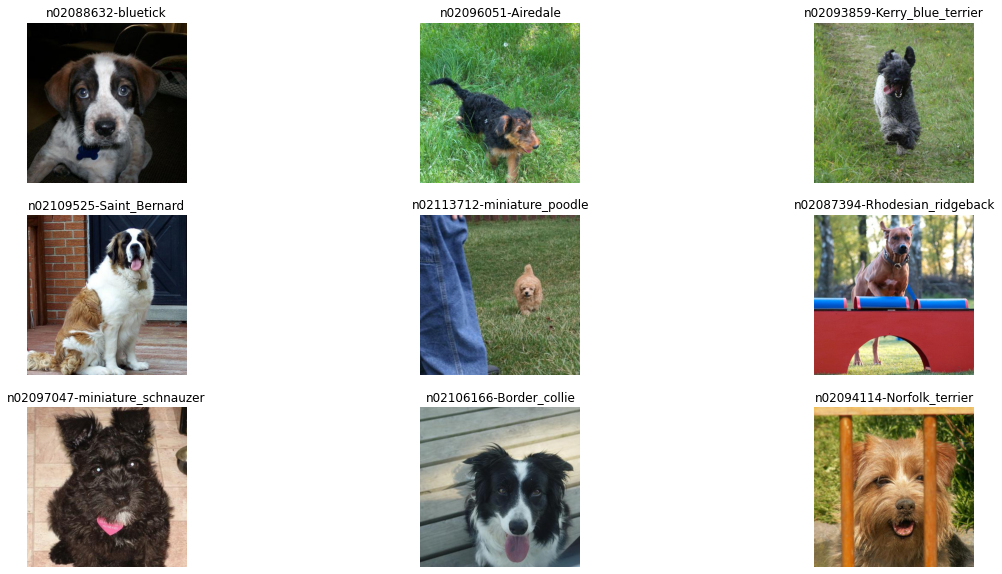

In [15]:
data.show_batch(max_n=9, figsize=(20,10))

In [16]:
learn = vision_learner(data, resnet34, metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [17]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.976613,0.698887,0.205782,03:50
1,0.852101,0.492143,0.148445,03:41
2,0.622610,0.442362,0.131924,03:40
3,0.535614,0.425147,0.131195,03:38


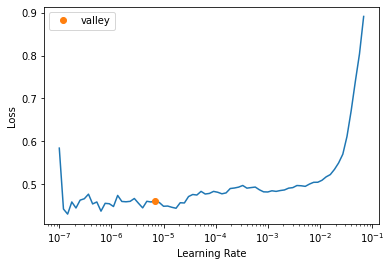

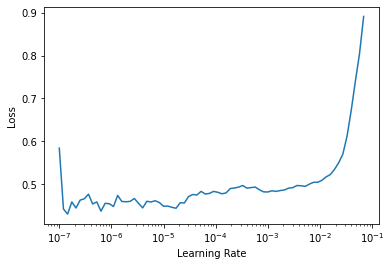

In [19]:
learn.lr_find()
learn.recorder.plot_lr_find()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.485145,0.422693,0.134111,03:47
1,0.445384,0.416077,0.128523,03:46
